In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

def nash_equilibrium(a):
  M = 0
  if a.min() <= 0:                            # Сделаем все элементы матрицы неотрицательными,
    M = abs(a.min())                          # так как это не влияет на процесс поиска решения
    a += M
  m = a.shape[0]                              # размеры матрицы (m*n)
  n = a.shape[1]

  c = np.ones((m))                            # необходимо минимизировать F = x1+...+xm = 1/V
  A_ub = -a.T                                 # сводим к неравенствам ≤ домножением матрицы и
  b_ub = -np.ones((n))                        # правой части на (-1)
                                    
  res = linprog(c, A_ub, b_ub)                # с помощью функции linprog полчаем
                                              # решение задачи:
                                              #   𝑐𝑇*𝑥 → 𝑚𝑖𝑛
                                              #   𝐴_𝑢𝑏*𝑥 ≤ 𝑏_𝑢𝑏 
                                              #   𝐴_𝑒𝑞*𝑥 = 𝑏_𝑒𝑞 
                                              #   𝑥 ≥ 0
  V = 1/res.fun - M   
  first_str = 1/res.fun * res.x                       
                                              
  c = -np.ones((n))                           # необходимо максимизировать F = y1+...yn = 1/V
  A_ub = a                                    # сведем задачу к задаче минимизации 
  b_ub = np.ones((m)) 
  res = linprog(c, A_ub, b_ub)
  second_str = (-1/res.fun) * res.x
  return V, first_str, second_str

def graph(P,Q):
    fig1 = plt.figure()                
    plt.axis([0, len(P) + 1, 0, 1.1])  # деления на осях в заданных промежутках
    for i in range(1, len(P) + 1, 1):
        plt.plot([i, i], [0.0, P[i-1]], 'b', lw = 0.6, alpha = 0.4)
        plt.scatter(i, P[i-1], s = 20, color = 'b')
    plt.xlabel('Стратегии')
    plt.ylabel('Вероятности')
    plt.minorticks_on()                   # мелкие деления на осях
    
    plt.text(len(P) + 1.5, 0.5, spectrum(P), fontsize = 18, horizontalalignment = 'left')
    plt.title('Спектр первого игрока')
    plt.show()
     
    
    fig2 = plt.figure()
    plt.axis([0, len(Q) + 1, 0, 1.1])
    for j in range(1, len(Q) + 1, 1):
        plt.plot([j,j], [0, Q[j-1]], 'b', lw = 0.6, alpha = 0.4)
        plt.scatter(j, Q[j-1], s = 20, color = 'b')
    plt.xlabel('Стратегии')
    plt.ylabel('Вероятности')
    plt.minorticks_on()

    plt.text(len(Q) + 1.5, 0.5, spectrum(Q), fontsize = 18, horizontalalignment = 'left')
    plt.title('Спектр второго игрока')
    plt.show()

def spectrum(P):
    t = 0
    for i in range(len(P)):
        if P[i] > 0 :
         t += 1
    if t == len(P):
        return "Спектр полон"
    elif t == 1 :
        return "Спектр состоит из одной точки"
    else :
        return "Спектр неполон"
    
def main(fin, fout):
    H = np.loadtxt(fin, dtype='float64')
    f = open(fout, 'w')
    print(H)
    sol = nash_equilibrium(H)
    print ("Выигрыш равен: ", sol[0])                
    print ("Стратегия первого игрока: ", sol[1])
    print ("Стратегия второго игрока: ", sol[2])
    f.write("%f\n" %sol[0])
    for c in sol[1]:
      f.write("%f " %c)
    f.write("\n")
    for c in sol[2]:
      f.write("%f " %c)
    graph(sol[1], sol[2])

[[ 0.   0.3  0.5]
 [ 0.6  0.1 -0.1]
 [ 0.4  0.2  0.1]]
Выигрыш равен:  0.24
Стратегия первого игрока:  [ 0.4  0.   0.6]
Стратегия второго игрока:  [ 0.2  0.8  0. ]


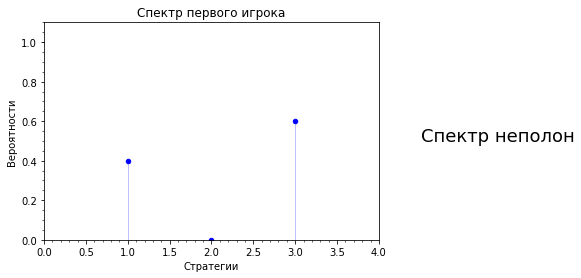

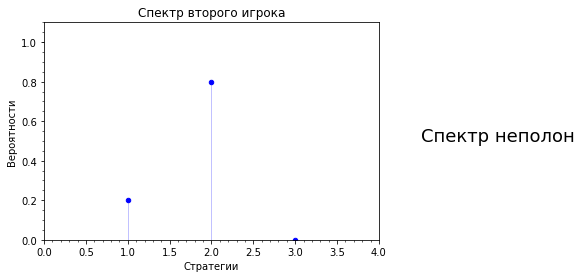

In [2]:
main('in/example_1.in','out/1.out')